In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.lunar import LUNAR

normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49666, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49666):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

neighbors 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.67      0.90      0.77      2498
       Relay       0.81      0.50      0.62      2166

    accuracy                           0.71      4664
   macro avg       0.74      0.70      0.69      4664
weighted avg       0.74      0.71      0.70      4664



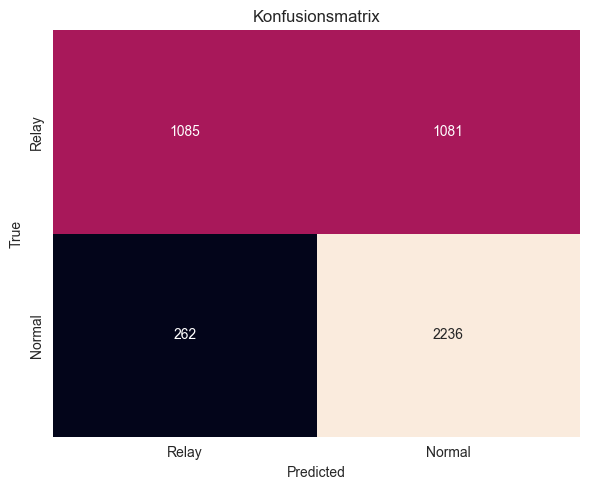

neighbors 2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2498
       Relay       0.93      0.18      0.30      2166

    accuracy                           0.61      4664
   macro avg       0.76      0.58      0.52      4664
weighted avg       0.74      0.61      0.53      4664



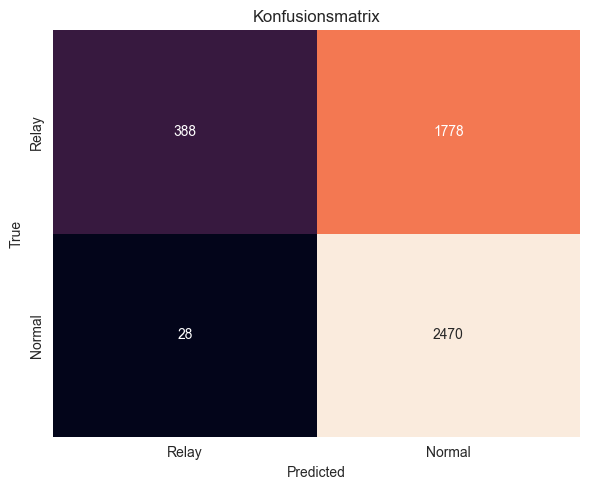

neighbors 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.60      0.99      0.74      2498
       Relay       0.93      0.23      0.37      2166

    accuracy                           0.63      4664
   macro avg       0.76      0.61      0.56      4664
weighted avg       0.75      0.63      0.57      4664



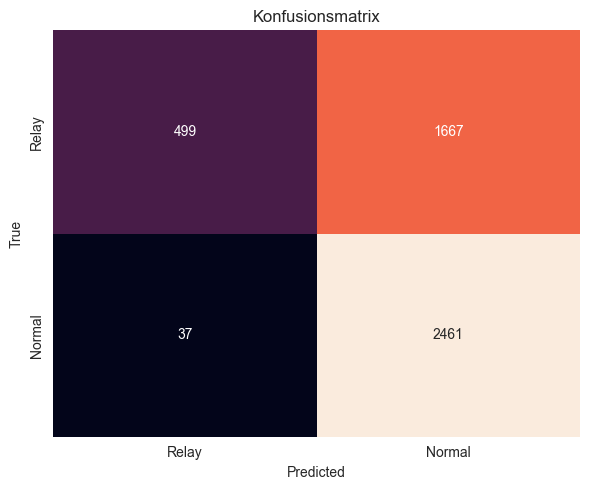

neighbors 4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2498
       Relay       0.95      0.16      0.27      2166

    accuracy                           0.60      4664
   macro avg       0.76      0.57      0.50      4664
weighted avg       0.75      0.60      0.51      4664



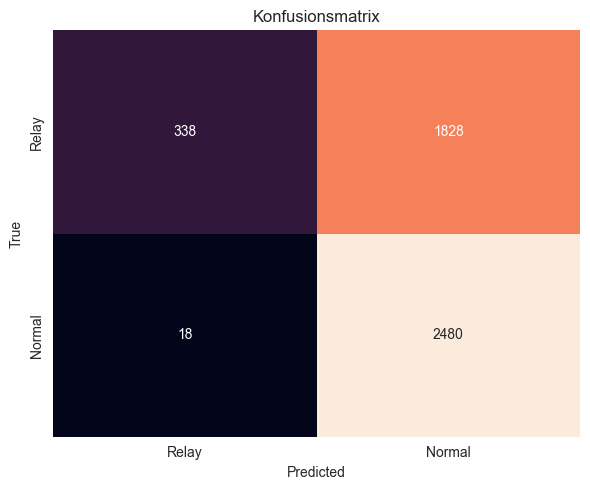

In [5]:
for n in {1,2,3,4}:
    clf = LUNAR(contamination=0.01, n_neighbours=n, scaler=None)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"neighbors {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

neighbors 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.89      0.70      2498
       Relay       0.65      0.23      0.34      2166

    accuracy                           0.58      4664
   macro avg       0.61      0.56      0.52      4664
weighted avg       0.61      0.58      0.53      4664



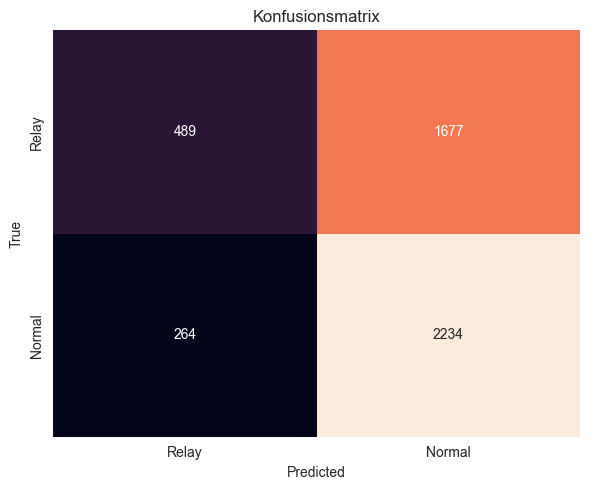

KeyboardInterrupt: 

In [6]:
for n in {1,2,3,4}:
    clf = LUNAR(contamination=0.01, n_neighbours=n, scaler=None)
    clf.fit(X_train_scaled_standard)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_standard)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"neighbors {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

neighbors 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      1.00      0.69      2497
       Relay       0.98      0.12      0.21      2498

    accuracy                           0.56      4995
   macro avg       0.75      0.56      0.45      4995
weighted avg       0.75      0.56      0.45      4995



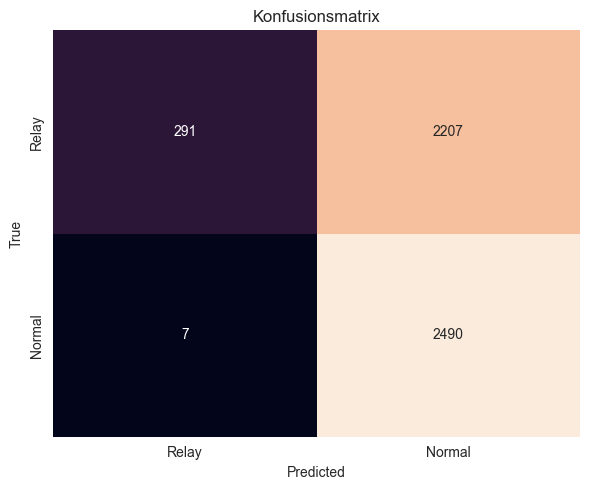

neighbors 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.70      2497
       Relay       0.97      0.17      0.29      2498

    accuracy                           0.58      4995
   macro avg       0.76      0.58      0.50      4995
weighted avg       0.76      0.58      0.50      4995



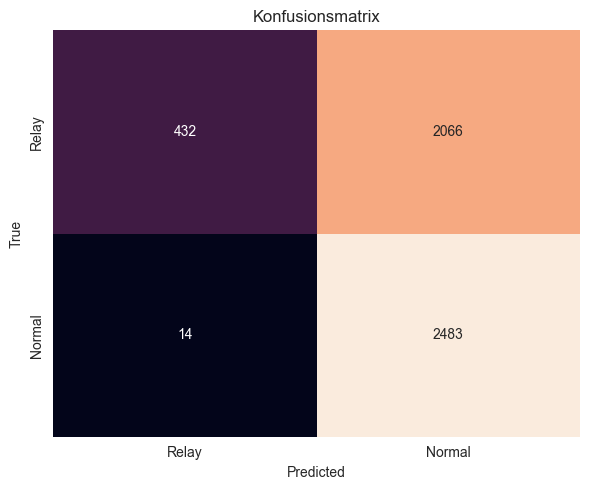

neighbors 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      1.00      0.70      2497
       Relay       0.98      0.14      0.24      2498

    accuracy                           0.57      4995
   macro avg       0.76      0.57      0.47      4995
weighted avg       0.76      0.57      0.47      4995



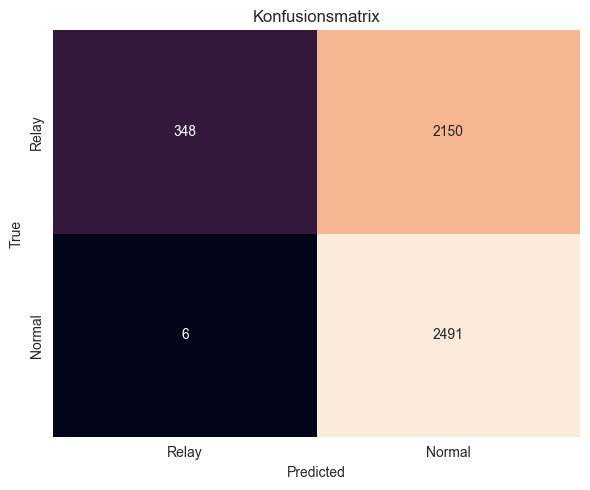

neighbors 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      1.00      0.69      2497
       Relay       0.97      0.11      0.20      2498

    accuracy                           0.55      4995
   macro avg       0.75      0.55      0.45      4995
weighted avg       0.75      0.55      0.45      4995



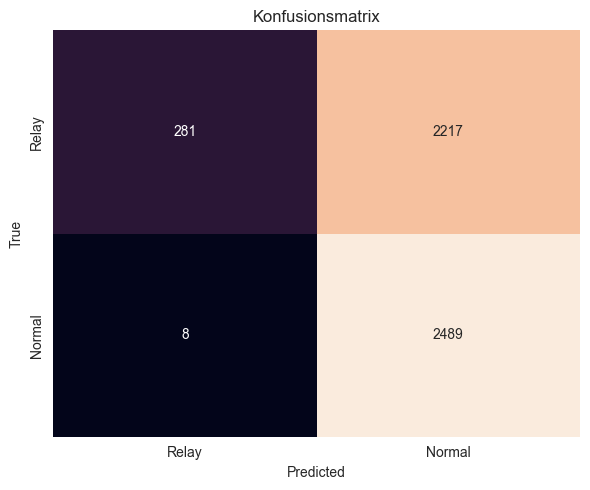

In [4]:
for n in {1,2,3,4}:
    clf = LUNAR(contamination=0.01, n_neighbours=n, scaler=None)
    clf.fit(X_train_scaled_minmax)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_minmax)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"neighbors {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

In [11]:
param_grid = [{
    # Zwei Scoring-Architekturen
    "model_type": ["WEIGHT", "SCORE"],
    # Nach Nutzer bereits für n_neighbors=1 gute Ergebnisse gesehen
    "n_neighbours": [1],
    # Art der Negativ-Proben
    "negative_sampling": ["UNIFORM", "SUBSPACE", "MIXED"],
    # Validierungs-Split-Größe
    "val_size": [0.05],
    # Skalierer
    "scaler": [MinMaxScaler(), StandardScaler()],
    # Negativ-Probe-Streuung
    "epsilon": [0.01, 0.1, 0.2],
    # Verhältnis negativer Beispiele
    "proportion": [0.5, 1.0, 2.0],
    # Trainings-Epochen
    "n_epochs": [200],
    # Lernrate
    "lr": [1e-3, 1e-4],
    # Anteil der Ausreißer im Datensatz
    "contamination": [0.01, 0.1],
}]

best_acc = 0
best_params = None

for params in ParameterGrid(param_grid[0]):
    clf = LUNAR(**params)
    clf.fit(X_train)

    y_pred = clf.predict(X_test_combined)

    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}  → Params: {params}")

    if acc > best_acc:
        best_acc = acc
        best_params = params

print("\nBeste Parameterkombination:", best_params)
print(f"Beste Accuracy: {best_acc:.4f}")


Accuracy: 0.6369  → Params: {'contamination': 0.01, 'epsilon': 0.01, 'lr': 0.001, 'model_type': 'WEIGHT', 'n_epochs': 200, 'n_neighbours': 1, 'negative_sampling': 'UNIFORM', 'proportion': 0.5, 'scaler': MinMaxScaler(), 'val_size': 0.05}
Accuracy: 0.5852  → Params: {'contamination': 0.01, 'epsilon': 0.01, 'lr': 0.001, 'model_type': 'WEIGHT', 'n_epochs': 200, 'n_neighbours': 1, 'negative_sampling': 'UNIFORM', 'proportion': 0.5, 'scaler': StandardScaler(), 'val_size': 0.05}
Accuracy: 0.6662  → Params: {'contamination': 0.01, 'epsilon': 0.01, 'lr': 0.001, 'model_type': 'WEIGHT', 'n_epochs': 200, 'n_neighbours': 1, 'negative_sampling': 'UNIFORM', 'proportion': 1.0, 'scaler': MinMaxScaler(), 'val_size': 0.05}
Accuracy: 0.5877  → Params: {'contamination': 0.01, 'epsilon': 0.01, 'lr': 0.001, 'model_type': 'WEIGHT', 'n_epochs': 200, 'n_neighbours': 1, 'negative_sampling': 'UNIFORM', 'proportion': 1.0, 'scaler': StandardScaler(), 'val_size': 0.05}
Accuracy: 0.6678  → Params: {'contamination': 0.

KeyboardInterrupt: 